In [3]:
import numpy as np
import matplotlib.pyplot as plt

def rezolvare_cu_k(f, k, L, A, B, N, u_exacta=None):
    h = L / (N + 1)  # Marimea pasului
    x = np.linspace(0, L, N+2)  # Include punctele de la limita
    
    # Evaluam k(x) in punctele medii
    x_mijloc = 0.5 * (x[:-1] + x[1:])
    k_mijloc = k(x_mijloc)
    
    # Cream matricea cu diferente finite
    diagonala_principala = np.zeros(N)
    diagonala_secundara = np.zeros(N-1)
    
    diagonala_principala = (k_mijloc[:-1] + k_mijloc[1:]) / h**2
    diagonala_secundara = -k_mijloc[1:-1] / h**2
    
    A_mat = np.diag(diagonala_principala) + np.diag(diagonala_secundara, -1) + np.diag(diagonala_secundara, 1)
    
    # Cream vectorul termenilor liberi
    F = f(x[1:-1])
    F[0] += A * k_mijloc[0] / h**2
    F[-1] += B * k_mijloc[-1] / h**2
    
    # Rezolvam sistemul
    u_interior = np.linalg.solve(A_mat, F)
    u = np.zeros(N+2)
    u[0], u[-1] = A, B
    u[1:-1] = u_interior
    
    # Calculam solutia exacta daca este furnizata
    u_ex = None
    if u_exacta is not None:
        u_ex = u_exacta(x)
    
    return x, u, u_ex

In [4]:
def analiza_erorii_cu_k(f, k, L, A, B, u_exacta, N_values):
    h_values = []
    erori = []
    
    for N in N_values:
        x, u, u_ex = rezolvare_cu_k(f, k, L, A, B, N, u_exacta)
        h = L / (N + 1)
        h_values.append(h)
        erori.append(np.max(np.abs(u - u_ex)))
    
    return h_values, erori


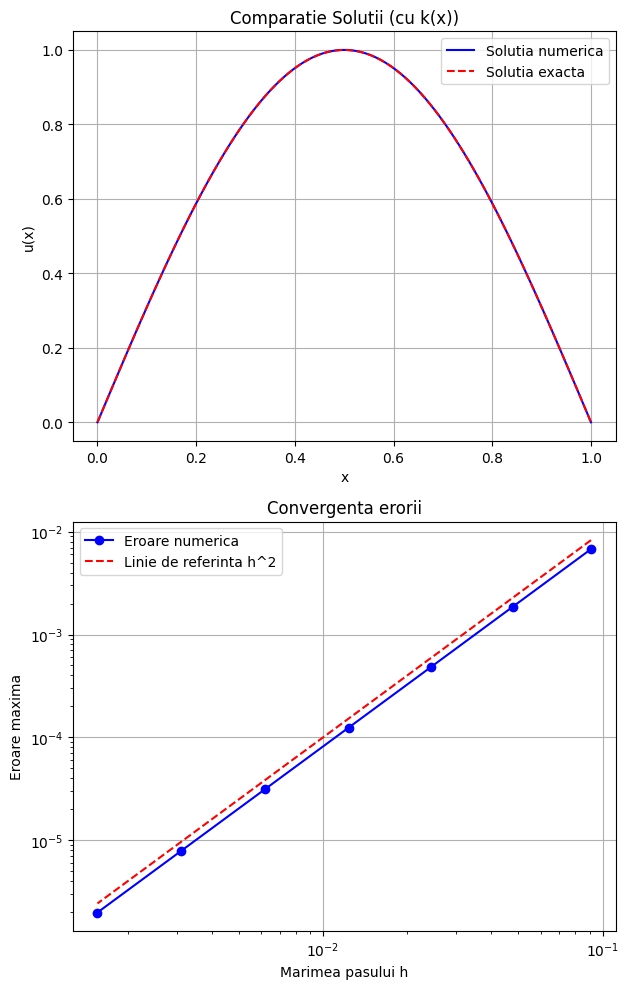

In [7]:
# Parametrii problemei
L = 1.0
A = 0.0
B = 0.0

# Definim functiile
def f(x):
    return np.pi**2 * (1 + x) * np.sin(np.pi * x) - np.pi * np.cos(np.pi * x)

def k(x):
    return 1 + x  # Functia de conductivitate termica

def u_exacta(x):
    return np.sin(np.pi * x)  # Solutia exacta pentru problema modificata

# Rezolvam si afisam pentru N=100
N = 100
x, u, u_ex = rezolvare_cu_k(f, k, L, A, B, N, u_exacta)

plt.figure(figsize=(12, 10))

# Graficul solutiilor
plt.subplot(2, 2, 1)
plt.plot(x, u, 'b-', label='Solutia numerica')
plt.plot(x, u_ex, 'r--', label='Solutia exacta')
plt.xlabel('x')
plt.ylabel('u(x)')
plt.title('Comparatie Solutii (cu k(x))')
plt.legend()
plt.grid(True)

# Analiza erorilor pentru diferite grile
N_values = [10, 20, 40, 80, 160, 320, 640]
h_values, erori = analiza_erorii_cu_k(f, k, L, A, B, u_exacta, N_values)

# Grafic log-log al erorii
plt.subplot(2, 2, 3)
plt.loglog(h_values, erori, 'bo-', label='Eroare numerica')
plt.loglog(h_values, [h**2 for h in h_values], 'r--', label='Linie de referinta h^2')
plt.xlabel('Marimea pasului h')
plt.ylabel('Eroare maxima')
plt.title('Convergenta erorii')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()